# Species Data Report


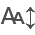

In [1]:
# import packages
import math
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

plt.rcParams["figure.dpi"] = 100
plt.rcParams['figure.figsize'] = [20, 6]

## Data Overview

In [2]:
# Import data
file_name = "../data/miceies/Sorex_vagrans.csv"
species_data = pd.read_csv(file_name).drop(columns=['catalognumberint', 'collectors', 'parts', 'reproductive data unit', 'unformatted measurements unit'])

# Convert all to metric units
for attribute in ["total length", "tail length", "hind foot with claw", "ear from notch", "ear from crown"]:
    species_data[attribute] = species_data.apply(lambda x: x[attribute] * 25.4 if x[f"{attribute} unit"] == 'in' else x[attribute], axis=1)
    #species_data = species_data.drop(columns=[f"{attribute} unit"])

species_data['weight'] = species_data.apply(lambda x: x['weight'] * 28.3495 if x["weight unit"] == 'oz' else x['weight'], axis=1)
#species_data = species_data.drop(columns=[f"weight unit"])

# Display data
species_data[["guid", "subspecies", "state_prov", "county", "date", "sex", "total length", "tail length", "hind foot with claw", "ear from notch", "ear from crown", "weight", "reproductive data", "unformatted measurements"]].replace({np.nan: None})

guid                 subspecies  state_prov  \
0     MVZ:Mamm:181247      Sorex vagrans vagrans  California   
1      MVZ:Mamm:65598  Sorex vagrans paludivagus  California   
2      MVZ:Mamm:94095      Sorex vagrans vagrans      Oregon   
3     MVZ:Mamm:229762      Sorex vagrans vagrans  California   
4      MVZ:Mamm:87002      Sorex vagrans vagrans  Washington   
...               ...                        ...         ...   
3289   MVZ:Mamm:34706      Sorex vagrans vagrans  California   
3290   MVZ:Mamm:97406      Sorex vagrans vagrans  California   
3291  MVZ:Mamm:101296      Sorex vagrans vagrans  California   
3292  MVZ:Mamm:101291      Sorex vagrans vagrans  California   
3293  MVZ:Mamm:101292      Sorex vagrans vagrans  California   

                county        date      sex total length tail length  \
0        Nevada County  1982-08-16     male        104.0        41.0   
1      Monterey County  1932-04-23  unknown         None        None   
2       Clatsop County  1940-08-21   female        100.0        59.0   
3     El Dorado County  2003-07-18  unknown         90.0        39.0   
4      Columbia County  1939-07-29  unknown         90.0        27.0   
...                ...         ...      ...          ...         ...   
3289     Plumas County  1924-07-22   female        111.0        40.0   
3290   Humboldt County  1942-01-03     male        102.0        37.0   
3291      Marin County  1944-06-04   female        105.0        42.0   
3292      Marin County  1944-06-04     male         None        43.0   
3293      Marin County  1944-06-04     male        104.0        39.0   

     hind foot with claw ear from notch ear from crown weight  \
0                   13.0            8.0           None    5.0   
1                   None           None           None   None   
2                   13.0            8.0           None    5.0   
3                   12.0            5.0           None    4.6   
4                   13.0            8.0           None    5.7   
...                  ...            ...            ...    ...   
3289                12.0            3.0           None    9.0   
3290                12.0            9.0            4.0    6.6   
3291                12.0            8.0            3.0    4.8   
3292                12.0            9.0            3.0    5.0   
3293                12.0            8.0            3.0    4.4   

     reproductive data unformatted measurements  
0                 juv.                     None  
1                 None                     None  
2                 None                     None  
3                 None                     None  
4                 None                     None  
...                ...                      ...  
3289              None                     None  
3290              None                     None  
3291           no emb.                     None  
3292              None  "total length": "105+-"  
3293              None                     None  

[3294 rows x 14 columns]

In [3]:
print("Total Specimens:", len(species_data))
print("Total Specimens with Partial Attributes:", len(species_data[pd.notna(species_data["total length"])]))
print("Total Specimens with Full Attributes:", len(species_data[["total length", "tail length", "hind foot with claw", "ear from notch", "weight"]].dropna()))
print("Total Specimens with Reproductive Data:", len(species_data[pd.notna(species_data["reproductive data"])]))

Total Specimens: 3294
Total Specimens with Partial Attributes: 2975
Total Specimens with Full Attributes: 2284
Total Specimens with Reproductive Data: 1593


## Species Collection Info

<Axes: title={'center': 'Specimens Collected Over Time'}, xlabel='decade'>

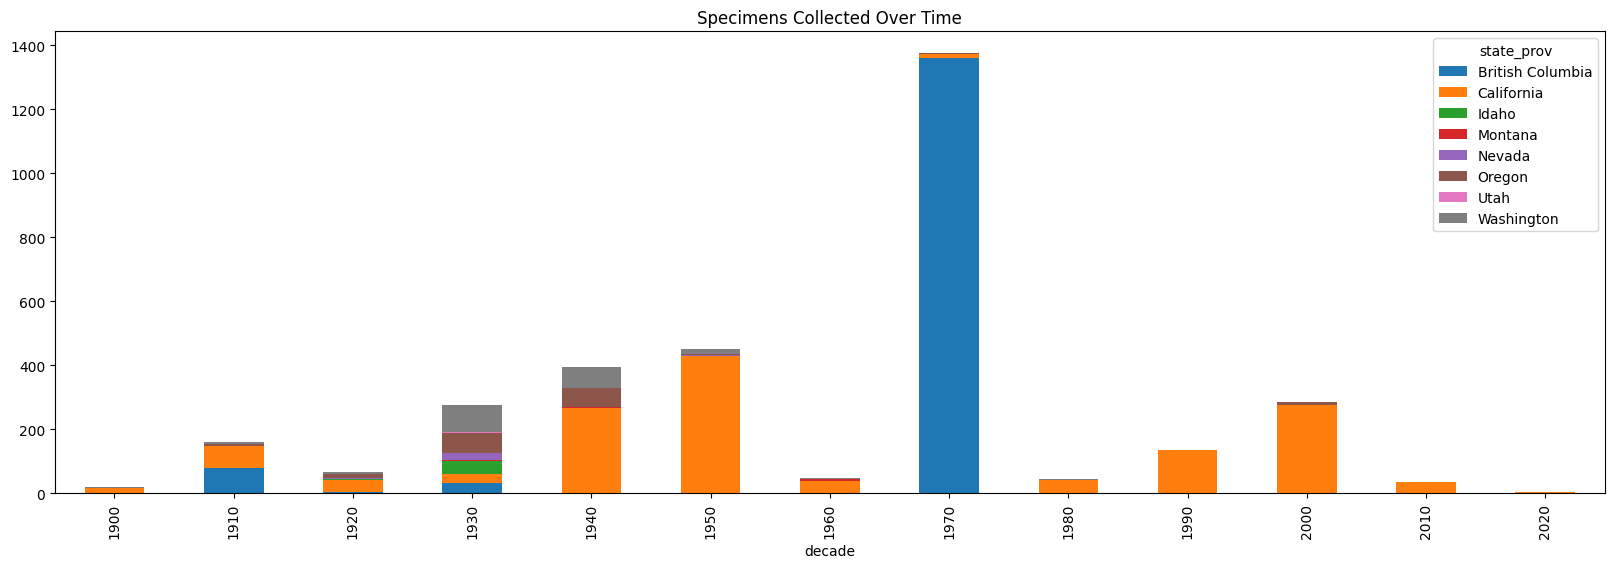

In [4]:
species_data["decade"] = pd.Series((pd.DatetimeIndex(species_data["date"]).year // 10) * 10)

species_data.groupby(["decade", "state_prov"]).size().unstack().plot(kind='bar', stacked=True,
        title='Specimens Collected Over Time')

## Attributes

### Total Length

<Axes: title={'center': 'Attributes collected'}, xlabel='decade'>

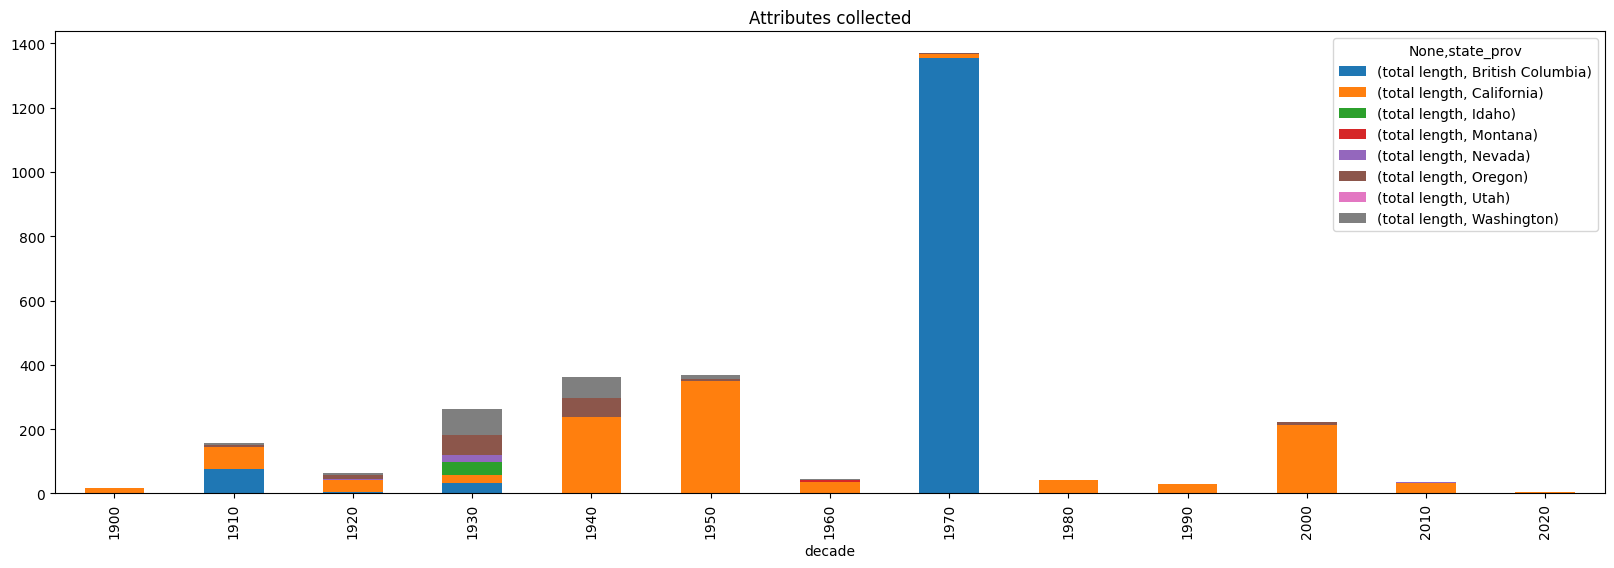

In [5]:
#print("Outliers", json.dumps(species_data[(species_data["total length"] > 150) | (species_data["total length"] < 50)][['guid', 'total length', 'tail length', 'hind foot with claw', 'ear from notch', 'ear from crown', 'weight']].to_dict(orient="records"), indent=4))
species_data[["decade", "state_prov", "total length"]].groupby(["decade", "state_prov"]).count().unstack().plot(kind='bar', stacked=True, title='Attributes collected')
#species_data.plot(kind="box", column=["total length"], by='decade', grid=False)

### Tail Length

Outliers [
    {
        "guid": "MVZ:Mamm:112143",
        "total length": 97.0,
        "tail length": -35.0,
        "hind foot with claw": 13.0,
        "ear from notch": 7.5,
        "ear from crown": NaN,
        "weight": NaN
    },
    {
        "guid": "MVZ:Mamm:95874",
        "total length": 102.0,
        "tail length": 400.0,
        "hind foot with claw": 11.0,
        "ear from notch": 5.0,
        "ear from crown": NaN,
        "weight": 5.1
    }
]


tail length    Axes(0.125,0.11;0.775x0.77)
dtype: object

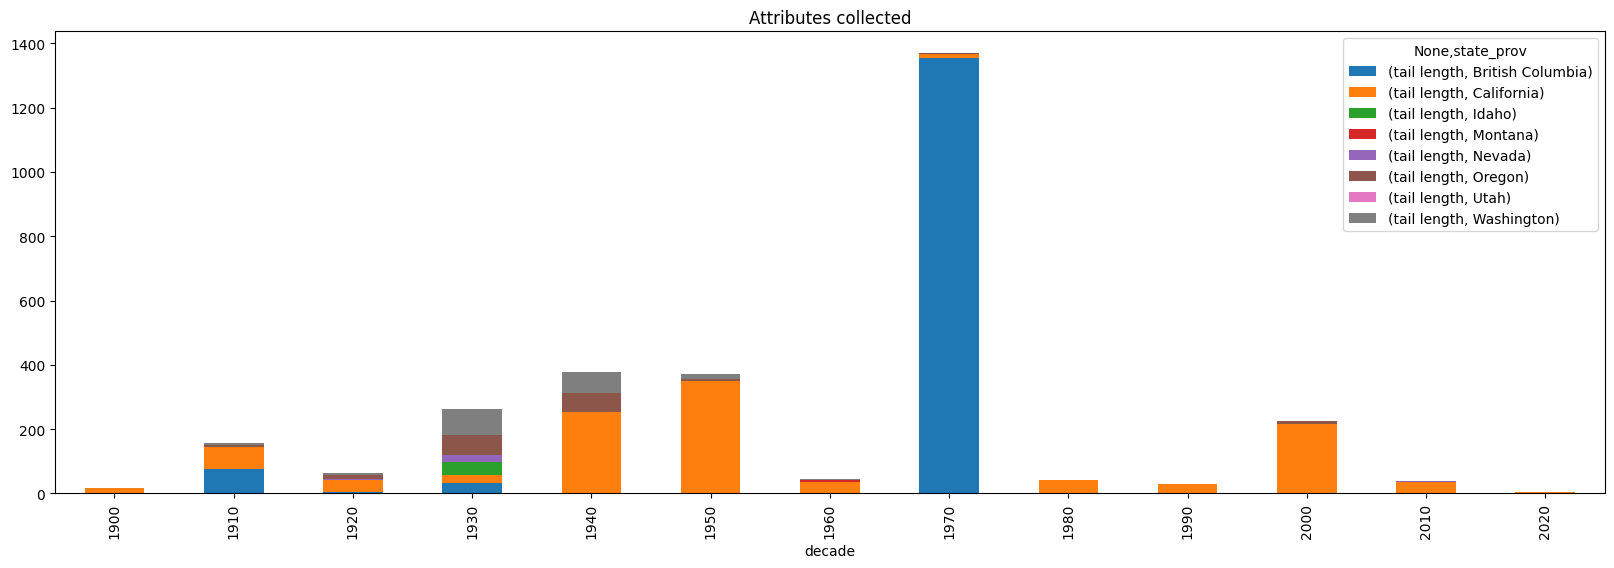

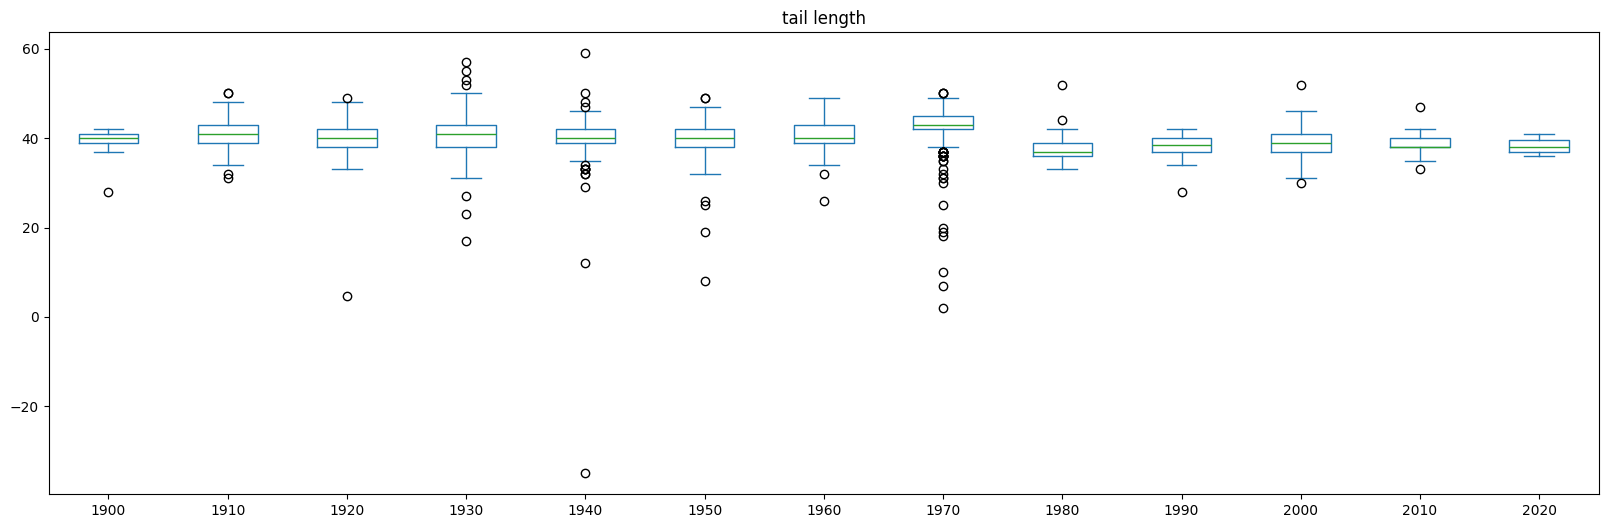

In [6]:
print("Outliers", json.dumps(species_data[(species_data["tail length"] > 100) | (species_data["tail length"] < 0)][['guid', 'total length', 'tail length', 'hind foot with claw', 'ear from notch', 'ear from crown', 'weight']].to_dict(orient="records"), indent=4))
species_data[["decade", "state_prov", "tail length"]].groupby(["decade", "state_prov"]).count().unstack().plot(kind='bar', stacked=True, title='Attributes collected')
species_data[species_data["tail length"] < 100].plot(kind='box', column=["tail length"], by='decade', grid=False)

### Hind Foot with Claw

hind foot with claw    Axes(0.125,0.11;0.775x0.77)
dtype: object

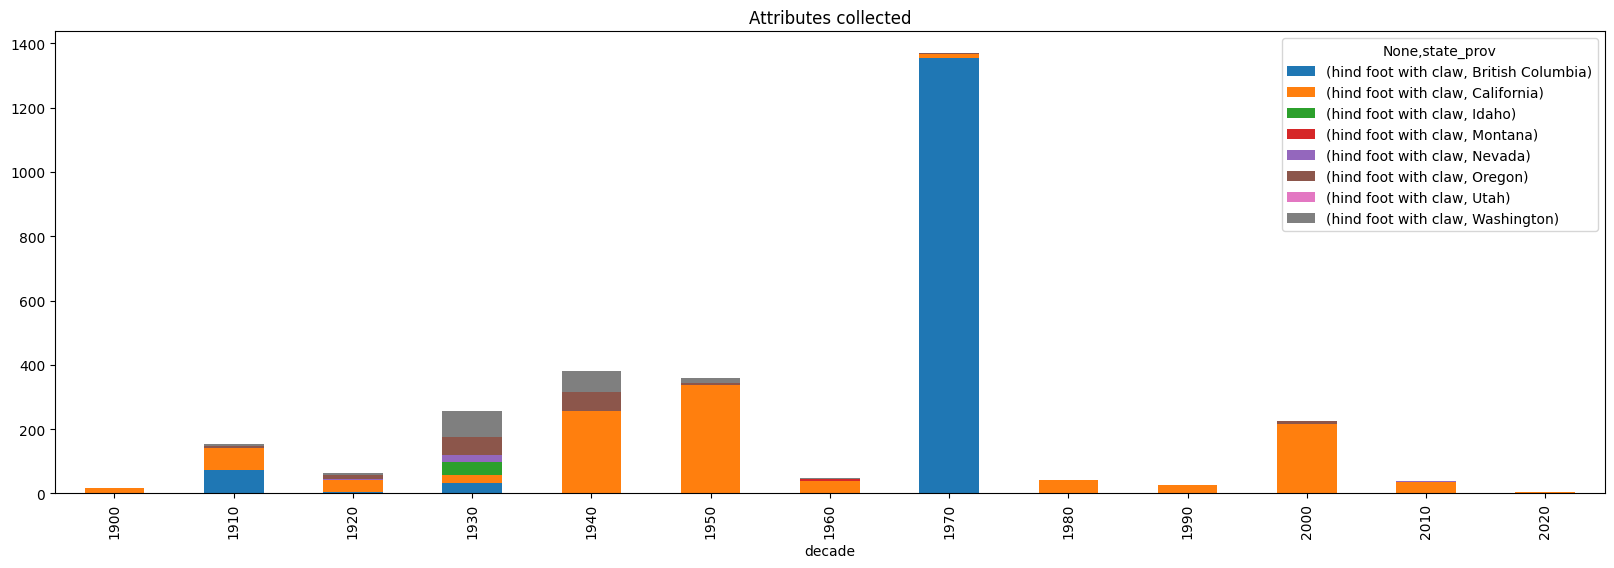

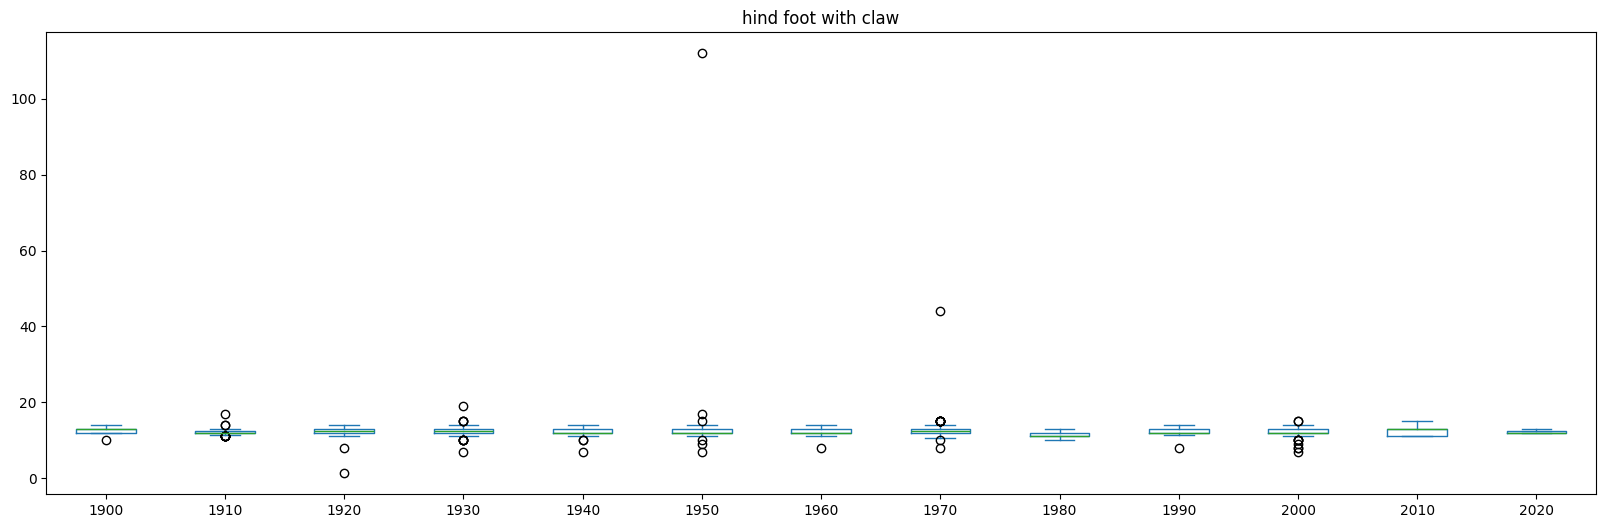

In [7]:
#print("Outliers", json.dumps(species_data[species_data["hind foot with claw"] > 20][['guid', 'total length', 'tail length', 'hind foot with claw', 'ear from notch', 'ear from crown', 'weight']].to_dict(orient="records"), indent=4))
species_data[["decade", "state_prov", "hind foot with claw"]].groupby(["decade", "state_prov"]).count().unstack().plot(kind='bar', stacked=True, title='Attributes collected')
species_data.plot(kind="box", column=["hind foot with claw"], by='decade', grid=False)

### Ear from Crown

ear from crown    Axes(0.125,0.11;0.775x0.77)
dtype: object

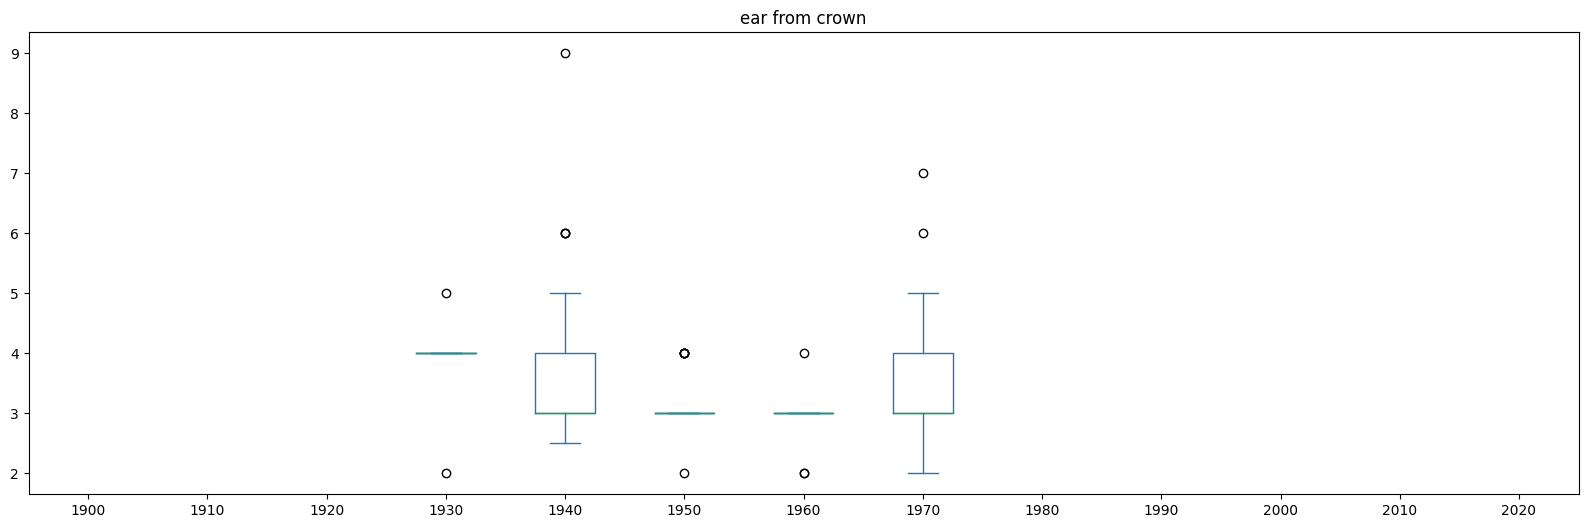

In [8]:
species_data.plot(kind="box", column=["ear from crown"], by='decade', grid=False)

### Weight

weight    Axes(0.125,0.11;0.775x0.77)
dtype: object

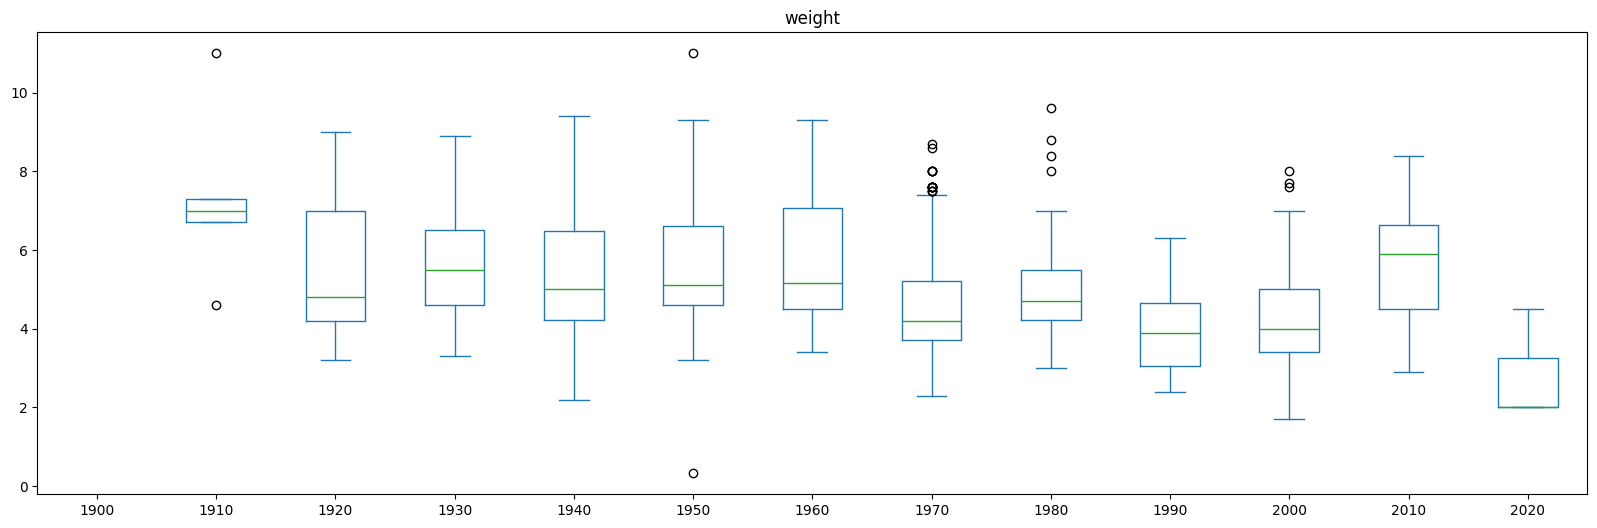

In [9]:
species_data.plot(kind="box", column=["weight"], by='decade', grid=False)

In [10]:
species_data[["guid", "subspecies", "state_prov", "county", "date", "sex", "total length", "tail length", "hind foot with claw", "ear from notch", "ear from crown", "weight", "reproductive data"]].groupby(["subspecies"]).count()

guid  state_prov  county  date   sex  \
subspecies                                                           
Sorex vagrans halicoetes       186         186     186   186   186   
Sorex vagrans paludivagus       53          53      53    53    53   
Sorex vagrans vagrans         2934        2934    1550  2934  2934   
Sorex vagrans vancouverensis    99          99       7    99    99   

                              total length  tail length  hind foot with claw  \
subspecies                                                                     
Sorex vagrans halicoetes               141          142                  144   
Sorex vagrans paludivagus               51           51                   51   
Sorex vagrans vagrans                 2669         2689                 2673   
Sorex vagrans vancouverensis            93           95                   92   

                              ear from notch  ear from crown  weight  \
subspecies                                                             
Sorex vagrans halicoetes                 128               5     107   
Sorex vagrans paludivagus                 42               9      12   
Sorex vagrans vagrans                   2363            1519    2343   
Sorex vagrans vancouverensis               6               0       0   

                              reproductive data  
subspecies                                       
Sorex vagrans halicoetes                     60  
Sorex vagrans paludivagus                    15  
Sorex vagrans vagrans                      1508  
Sorex vagrans vancouverensis                  0

## Identifying Outliers

<Axes: title={'center': 'Total Length vs Tail Length Outlier Chart'}, xlabel='total length', ylabel='tail length'>

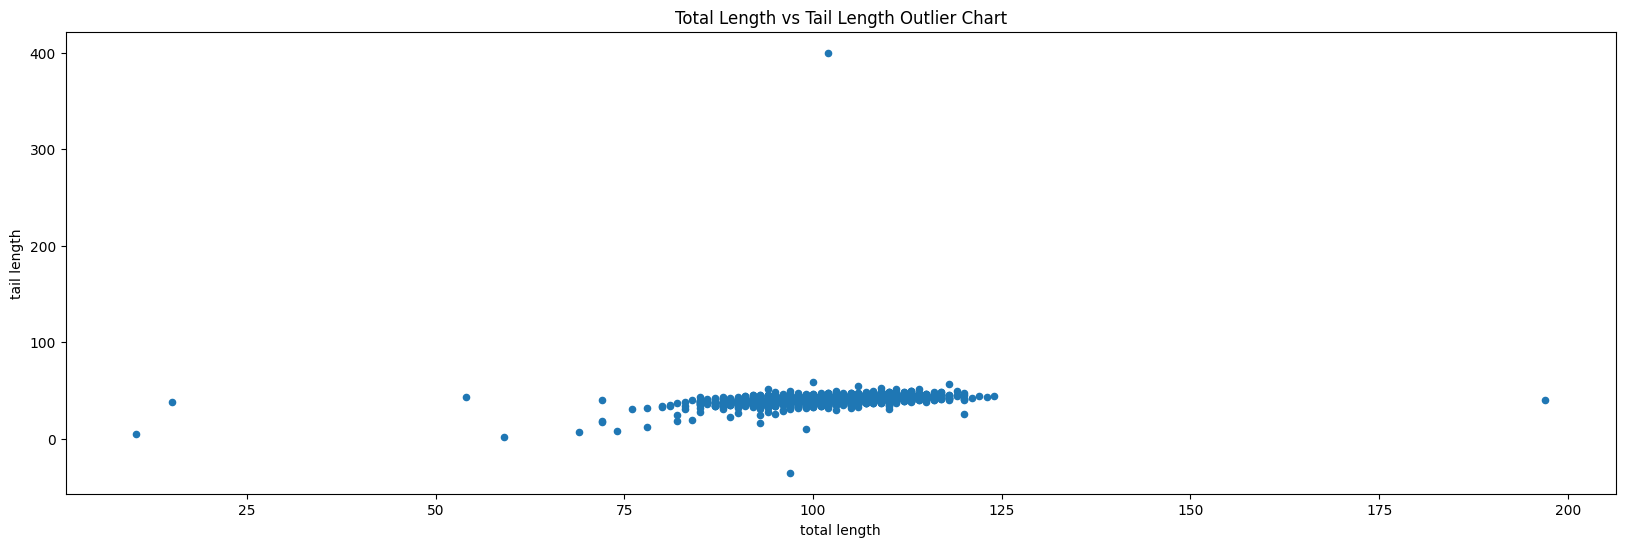

In [11]:
species_data.plot(kind='scatter', x="total length", y="tail length", title='Total Length vs Tail Length Outlier Chart')

<Axes: title={'center': 'Total Length vs Weight Outlier Chart'}, xlabel='total length', ylabel='weight'>

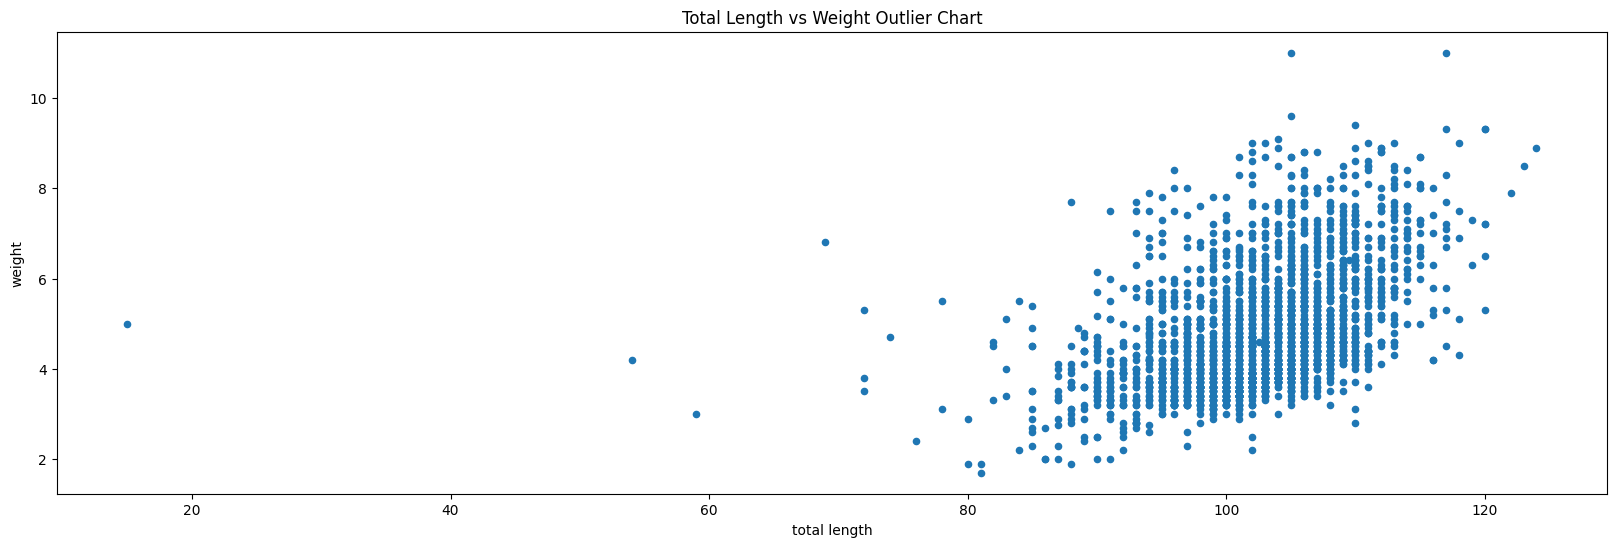

In [12]:
species_data.plot(kind='scatter', x="total length", y="weight", title='Total Length vs Weight Outlier Chart')

<Axes: title={'center': 'Total Length vs Hind Foot With Claw Outlier Chart'}, xlabel='total length', ylabel='hind foot with claw'>

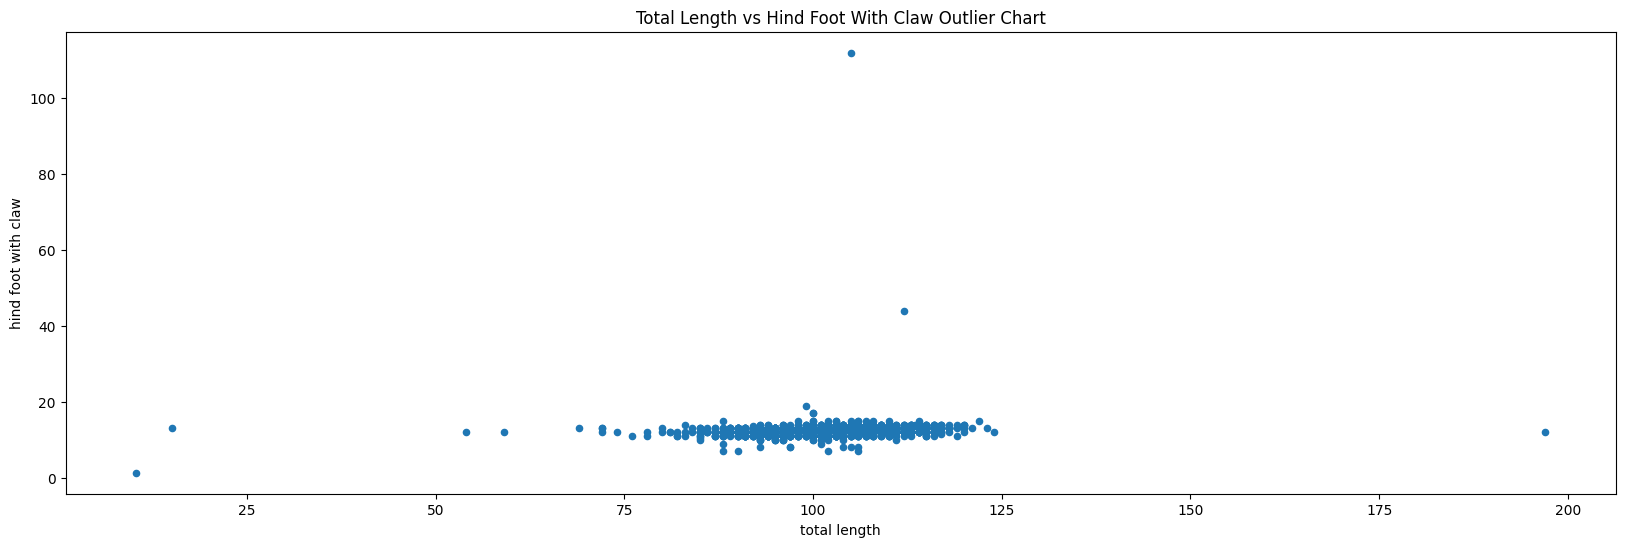

In [13]:
species_data.plot(kind='scatter', x="total length", y="hind foot with claw", title='Total Length vs Hind Foot With Claw Outlier Chart')

<Axes: title={'center': 'Weight vs Hind Foot With Claw Outlier Chart'}, xlabel='weight', ylabel='hind foot with claw'>

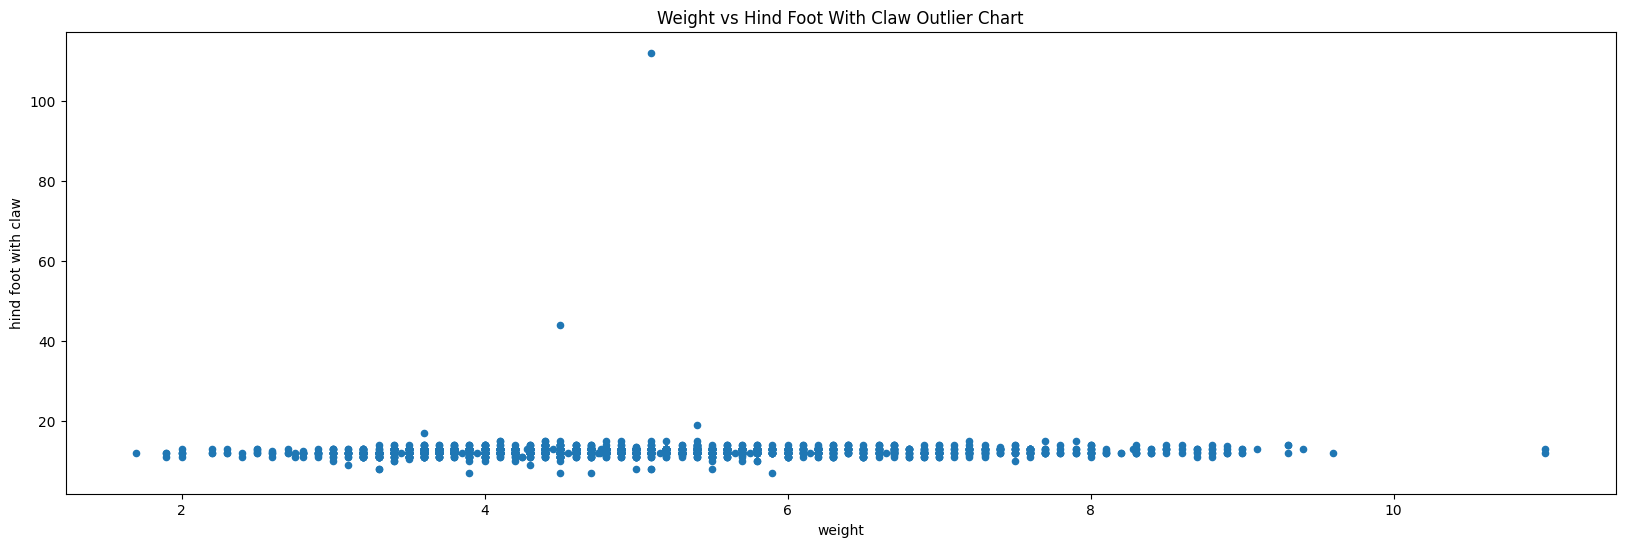

In [14]:
species_data.plot(kind='scatter', x="weight", y="hind foot with claw", title='Weight vs Hind Foot With Claw Outlier Chart')

<Axes: title={'center': 'Total Length vs Tail Length Outlier Chart'}, xlabel='total length', ylabel='ear from notch'>

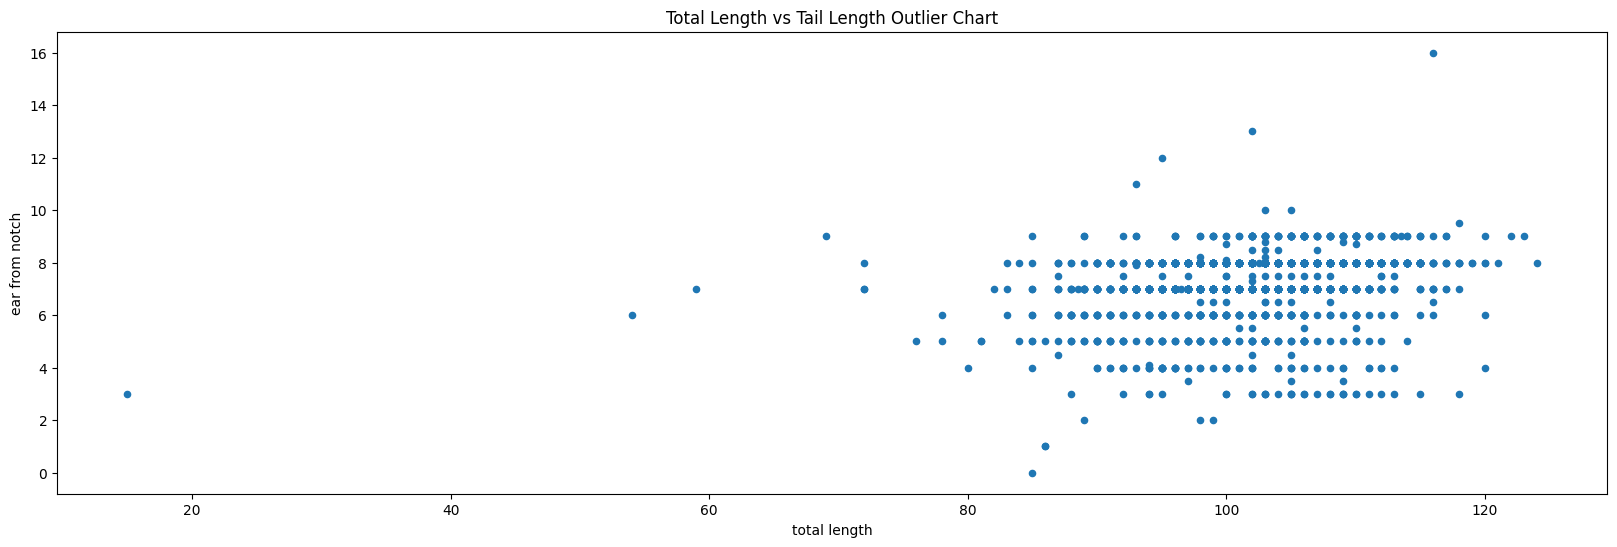

In [15]:
species_data.plot(kind='scatter', x="total length", y="ear from notch", title='Total Length vs Tail Length Outlier Chart')